# 簡単な線型回帰をしてみよう

## 線形単回帰の概要

線形単回帰は、1入力1出力の線形モデルを使って、データ間の関係を表す手法です。これは、データを予測するために、予測関数と損失関数を用いてパラメータを更新します。

1. 予測関数
線形単回帰の予測関数は、以下のような形式を持っています:

$$
\hat{y} = wx + b
$$

ここで、$\hat{y}$は予測値、$w$は重み、$x$は入力データ、$b$はバイアスです。

2. 損失関数
線形単回帰では、損失関数として平均二乗誤差（MSE）が一般的に使用されます。これは、予測値と実際の値の差の二乗の平均を計算します:

$$
L(w, b) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

3. パラメータの更新
損失関数を最小化するように、パラメータ$w$と$b$を更新することが目的です。勾配降下法（SGDなど）を用いて、損失関数の勾配に従ってパラメータを更新します:

$$
w \leftarrow w - \eta \frac{\partial L}{\partial w}
$$

$$
b \leftarrow b - \eta \frac{\partial L}{\partial b}
$$

ここで、$\eta$は学習率です。

4. PyTorchを使った実装
PyTorchを使って線形単回帰を実装する際には、以下のようなステップがあります:
   1. データの準備
   2. モデルの定義
   3. 損失関数と最適化アルゴリズムの選択
   4. モデルの学習
   5. モデルの評価(これは今回は定量的には実装しません。損失が十分低くなっていればokとします。)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchviz import make_dot
import japanize_matplotlib

## 1. データの準備
### 1.1 データの取得

今回は実装してみたいだけなので手入力用意します。

In [ ]:
smapleDara1 = np.array([
    [166,58.7],
    [176.0,75.7],
    [171.0,62.1],
    [173.0,70.4],
    [169.0,60.1]
])

x=smapleDara1[:,0]
y=smapleDara1[:,1]

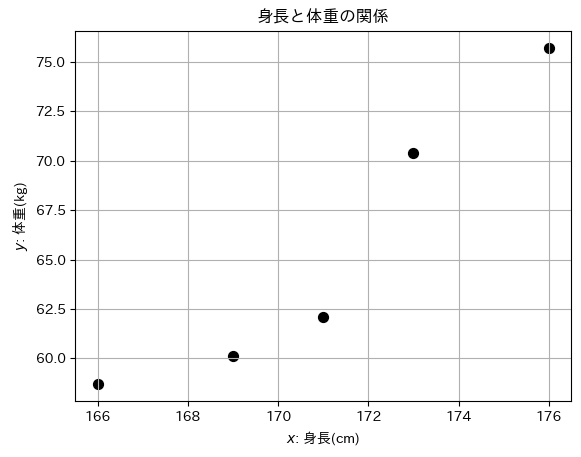

In [22]:
plt.grid(True)
plt.scatter(x,y,c='k',s=50)
plt.xlabel('$x$: 身長(cm)')
plt.ylabel('$y$: 体重(kg)')
plt.title('身長と体重の関係')
plt.show()

### 1.2 データの変換

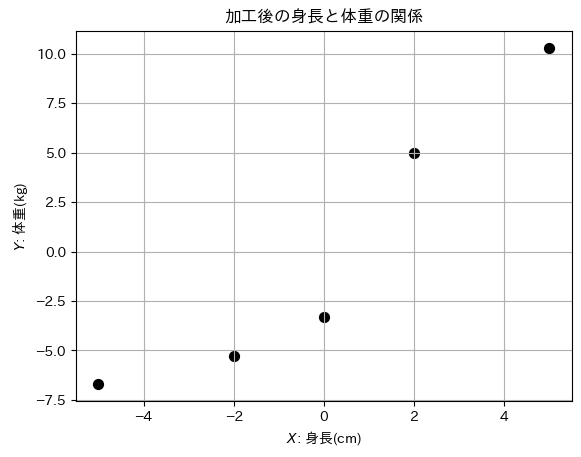

In [23]:
X = x - x.mean()
Y = y - y.mean()
plt.grid(True)
plt.scatter(X,Y,c='k',s=50)
plt.xlabel('$X$: 身長(cm)')
plt.ylabel('$Y$: 体重(kg)')
plt.title('加工後の身長と体重の関係')
plt.show()

### 1.2.1 テンソルに変換

In [24]:
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

## 2. モデルの定義
### 2.1 パラメータの定義

In [34]:
W = torch.tensor(1.0,requires_grad=True).float()
B = torch.tensor(1.0,requires_grad=True).float()

### 2.2 パラメータを利用して予測関数の定義

In [35]:
def pred(X):
    return W*X+B

In [36]:
Yp=pred(X)

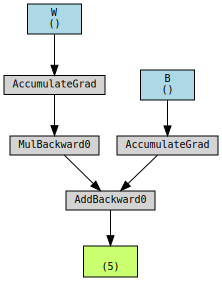

In [37]:
params = {'W':W,'B':B} 
g=make_dot(Yp,params=params)
display(g)

## 3. 損失関数の定義

In [38]:
def mse(Yp,Y):
    loss=((Yp-Y)**2).mean()
    return loss

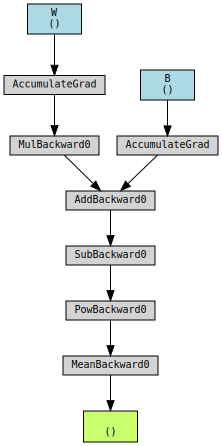

In [39]:
loss=mse(Yp,Y)
params = {'W':W,'B':B} 
g=make_dot(loss,params=params)
display(g)

In [40]:
loss.backward()

## (extra 1.) 繰り返し実行する前に1回だけパラメータの更新をしてみる

In [43]:
lr=0.001
with torch.no_grad():
    W-=lr*W.grad
    B-=lr*B.grad
    W.grad.zero_()
    B.grad.zero_()

## 4. 学習する
## 4.1 繰り返し回数、学習率などの用意、重みの初期化と微分を可能にする処理

In [14]:
W = torch.tensor(1.0,requires_grad=True).float()
B = torch.tensor(1.0,requires_grad=True).float()
num_epochs = 500
lr = 0.001
history=np.zeros((0,2)) #0行2列の配列


## 4.2 学習をする

In [15]:
for epoch in range(num_epochs):
    Yp=pred(X)
    loss=mse(Yp,Y)
    loss.backward()
    with torch.no_grad(): #勾配降下法（SGD)の実装、勾配の計算を行わない(でないとエラーがでる)
        W-=lr*W.grad #Wの更新
        B-=lr*B.grad #Bの更新
        W.grad.zero_() #勾配の初期化
        B.grad.zero_() #勾配の初期化
    if(epoch%10==0):
        item=np.array([epoch,loss.item()])
        history=np.vstack((history,item))

print('W = ',W.data.numpy())
print('B = ',B.data.numpy())
print(f'初期状態: 損失:{history[0,1]:.4f}')
print(f'最終状態: 損失:{history[-1,1]:.4f}')

W =  1.820683
B =  0.3675114
初期状態: 損失:13.3520
最終状態: 損失:4.6796


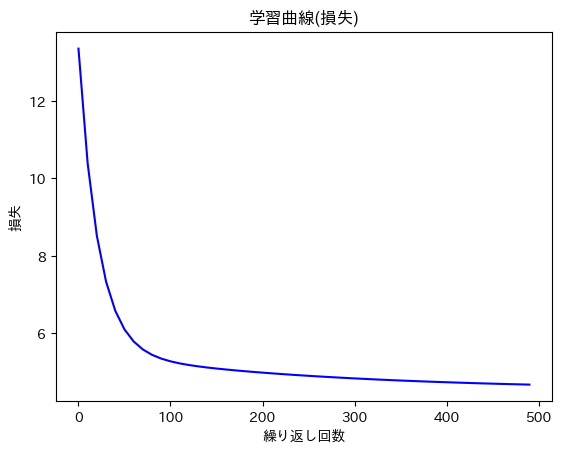

In [16]:
plt.plot(history[:,0],history[:,1],'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()

## (extra 2.)最適化関数optimizerを使ってみよう
### (extra 2.1) 最適化関数optimizerに勾配降下法（SGD)を用いる


In [17]:
W = torch.tensor(1.0,requires_grad=True).float()
B = torch.tensor(1.0,requires_grad=True).float()
num_epochs = 500
lr = 0.001
history=np.zeros((0,2)) #0行2列の配列

import torch.optim as optim
optimizer = optim.SGD([W,B], lr=lr)

### (extra 2.2) 最適化関数optimizerで学習

In [18]:
for epoch in range(num_epochs):
    Yp=pred(X)
    loss=mse(Yp,Y)
    loss.backward()
    #-----------------変更点----------------
    optimizer.step() #値更新
    optimizer.zero_grad() #勾配初期化
    #--------------------------------------
    if(epoch%10==0):
        item=np.array([epoch,loss.item()])
        history=np.vstack((history,item))

print('W = ',W.data.numpy())
print('B = ',B.data.numpy())
print(f'初期状態: 損失:{history[0,1]:.4f}')
print(f'最終状態: 損失:{history[-1,1]:.4f}')

W =  1.820683
B =  0.3675114
初期状態: 損失:13.3520
最終状態: 損失:4.6796


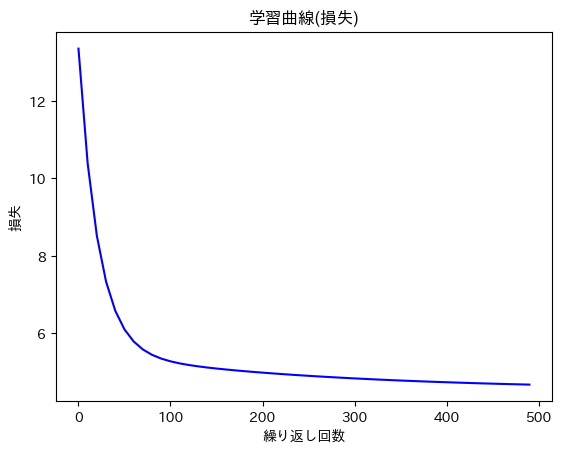

In [19]:
plt.plot(history[:,0],history[:,1],'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()